# ATN Sales Orders Analysis

In [1]:
cd C:\Users\lselmi\cygwin64\home\lselmi\anaconda\altertech\datasets

C:\Users\lselmi\cygwin64\home\lselmi\anaconda\altertech\datasets


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
pd.__version__

'0.22.0'

### Read the data
Import the records from a CSV file into a dataframe

In [3]:
sales = pd.read_csv('PurchaseData_20180319.csv')

C:\Users\lselmi\Downloads\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sales.head()

,FamilyPath_Flight,ComponentNumber_MAT_Flight,Style_Flight,QLevel_Flight,PRICE LABEL,Material,MAT_Flight,PO_Date,PO_Currency,PO_Change,...,PACKAGE,FINISH,FamilyRoot,MnfrDoeeetName,POP_MfrContinent,ManufacturerCountry,Qualified,StyleStandard,QualityValueName,SpecificationName
0,Microcircuits/Signal Acquisition-Conditioning/...,5962-8771002GA,LM158,QML Q,MATERIAL UNIT PRICE,AB68ALM158AH000,AB68ALM158AH000,20130402,EUR,1.0,...,CAN-8,NaN,Microcircuits,Texas Instruments SVA(formerly NSC),North America,USA,Y,Generic_158,Class 2,5962-87710
1,Resistors/Film/Precision,4001011089091B,RCK02HR,ESCC,MATERIAL UNIT PRICE,AB6AM6PK0900000,AB6AM6PK0900000,20130403,EUR,1.0,...,Radial,NaN,Resistors,Vishay Sfernice,Europe,France,N,RNC90,Class 1,ESCC 4001/011
2,Capacitors/Tantalum Solid,M39003/06-4076B,CSR33,WEIBULL D,MATERIAL UNIT PRICE,ARG0Q133V000000,ARG0Q133V000000,20140728,EUR,1.0,...,Axial,NaN,Capacitors,Kemet Electronics Corp.,North America,USA,Y,CSR33,Class 1,MIL-PRF-39003/6
3,Capacitors/Tantalum Solid,CWR29MK106JRHB,CWR29,FAILURE RATE R,MATERIAL UNIT PRICE,ARG0T291000JA00,ARG0T291000JA00,20171011,EUR,1.0,...,Chip,NaN,Capacitors,Kemet Electronics Corp.,North America,USA,Y,CWR29,Class 2,MIL-PRF-55365/11
4,Capacitors/Tantalum Solid,CWR29MK685JRGB,CWR29,FAILURE RATE R,MATERIAL UNIT PRICE,ARG0T295680JA00,ARG0T295680JA00,20171011,EUR,1.0,...,Chip,NaN,Capacitors,Kemet Electronics Corp.,North America,USA,Y,CWR29,Class 2,MIL-PRF-55365/11


In [5]:
sales.columns # print all columns

Index(['FamilyPath_Flight', 'ComponentNumber_MAT_Flight', 'Style_Flight',
       'QLevel_Flight', 'PRICE LABEL', 'Material', 'MAT_Flight', 'PO_Date',
       'PO_Currency', 'PO_Change', 'POP_DeliveryDate', 'POP_Qty',
       'POP_QtyUnit', 'POP_UnitPrice_CU', 'POP_MfrLeadTime_Calc',
       'INDUCTANCE_T', 'INDUCTANCE_N', 'RESISTANCE_T', 'RESISTANCE_N',
       'CAPACITANCE_T', 'CAPACITANCE_N', 'FREQUENCY_T', 'FREQUENCY_N',
       'CONTACT_CONFIGURATION', 'RES_CASESIZE', 'CAP_CASE', 'TOLERANCE_T',
       'TOLERANCE_N', 'TEMPCOEFFICIENT_T', 'TEMPCOEFFICIENT_N',
       'DC_RATED_VOLTAGE_T', 'DC_RATED_VOLTAGE_N', 'RATED_COIL_VOLTAGE_T',
       'RATED_COIL_VOLTAGE_N', 'TID_HDR_T', 'TID_HDR_N', 'TID_LDR_T',
       'TID_LDR_N', 'PACKAGECLASS', 'PACKAGE', 'FINISH', 'FamilyRoot',
       'MnfrDoeeetName', 'POP_MfrContinent', 'ManufacturerCountry',
       'Qualified', 'StyleStandard', 'QualityValueName', 'SpecificationName'],
      dtype='object')

### Data preparation
1. Use only records without charges
2. Convert all the prices to €

#### Use only records without charges

In [6]:
sales = sales[sales['PRICE LABEL'] == 'MATERIAL UNIT PRICE']
sales.index.size

18508

#### Convert all the prices to €
TBD

### Families of electronic components
(see Wikipedia's __[page](https://en.wikipedia.org/wiki/Electronic_component)__)
- Passive Components
 - Capacitors                     
 - Inductors, Coils and Chokes    
 - Resistors                      
 - Thermistors                    
 - Wire and Cables                
 - Transformers                 
 - Filters                        
 - Fuses                          

- Active Components
 - Relays                         
 - Discretes                      
 - Microcircuits                  

- Electromechanical Components
 - Switches                       
 - Crystals                       
 - Connectors                     

#### Number of records per component family

In [7]:
for (family, group) in sales.groupby('FamilyRoot'):
    print("{0:30s} records={1}".format(family, group.shape[0]))

Capacitors                     records=2812
Connectors                     records=2232
Crystals                       records=1
Discretes                      records=1711
Filters                        records=12
Fuses                          records=23
Inductors, Coils and Chokes    records=318
Microcircuits                  records=3041
Relays                         records=35
Resistors                      records=8027
Switches                       records=61
Thermistors                    records=123
Transformers                   records=22
Wire and Cables                records=90


### General Data Analysis
1. Number of records per component family
2. Number of records per part number
3. ...

#### Number of records per part number
There are 9062 part numbers. 50 % of the records are about one single part number.

In [8]:
recordsByPartNumberDict = {}
for (partnumber, group) in sales.groupby('ComponentNumber_MAT_Flight'):
    partnumber = "'" + partnumber + "'"
    recordsByPartNumberDict[partnumber] = group.shape[0]
    #print("{0:30s} shape={1}".format(partnumber, group.shape[0]))
recordsByPartNumber = pd.Series(recordsByPartNumberDict)
recordsByPartNumber.describe()

count    9062.000000
mean        2.042375
std         2.810376
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        47.000000
dtype: float64

#### Components with only 1 record (%)

In [19]:
partNumber1 = recordsByPartNumber[recordsByPartNumber.values == 1]
100 * partNumber1.size / recordsByPartNumber.count()


65.81328625027588

#### Components with 2 or more records

In [21]:
partNumber2 = recordsByPartNumber[recordsByPartNumber.values >= 2]
partNumber2.size 

3098

### Extract the part numbers 

In [299]:
partNumbers = pd.Series(sales['ComponentNumber_MAT_Flight'])

In [300]:
partNumbers[:3]

0     5962-8771002GA
1     4001011089091B
2    M39003/06-4076B
Name: ComponentNumber_MAT_Flight, dtype: object

In [301]:
partNumbers.values

array(['5962-8771002GA', '4001011089091B', 'M39003/06-4076B', ...,
       '520200105', '520200105', '520200105'], dtype=object)

In [302]:
partNumbers.size

18508

### Examples
We analyze the dependency of the price on the quantity. For each component we use only the records fro which the field "PRICE LABEL" is set to "MATERIAL UNIT PRICE". All the examples are active components.
1. 5962F0252401VXC
2. 5962R0722701VZA
3. 520100205R
4. 5962R9673802VDA
5. 520200105R
6. 510102608
7. 5962F0253501VXA
8. 520301006R
9. 520700215
10. 5962F0252401VXA

#### Compute the average price per unit per quantity

In [362]:
def compute_average_price(partNumber):
    """
    Computes the average prices of a component when sold in different quantities
    """
    quality_intervals = np.array([[0,11], [10,26], [25,51], [50,101], [100,201], [200,501]])
    price_per_quantity = list() # stores the average price for each quantity interval
    error_per_quantity = list() # stores the price error 
    for i in range(quality_intervals.shape[0]):  
        lower_quantity = quality_intervals[i][0]
        upper_quantity = quality_intervals[i][1]
        component = sales[partNumbers.values == partNumber] # select the records related to the part number
        unit_price = component[(component['POP_Qty'] > lower_quantity) & (component['POP_Qty'] <= upper_quantity)]['POP_UnitPrice_CU']
        price_per_quantity.append(unit_price.mean()) # compute the mean of the prices within a quantity interval
        error_per_quantity.append(unit_price.std())
    return price_per_quantity, error_per_quantity

In [394]:
def plot_prices(prices, errors):
    """
    Plots the component's average price per quantity
    """
    x_pos = np.arange(len(prices))
    plt.xlabel("quantity bucket")
    plt.ylabel("average price per quantity");
    plt.errorbar(x_pos,prices, yerr=errors, marker='o')

## Analysis of the dependence of the price from the quantity
For microcircuits

#### Example 1 Part number 5962F0252401VXC (Microcircuit)

[415.305, 409.54333333333335, 402.0, 406.0, 418.40000000000003, 386.0]


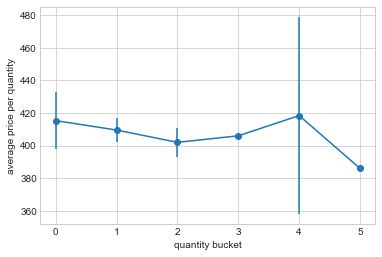

In [384]:
example1_prices, example1_errors = compute_average_price('5962F0252401VXC')
print(example1_prices)
plot_prices(example1_prices, example1_errors)

#### Example 2 - Part Number 5962R0722701VZA (Microcircuit)

[2555.6395652173915, 2585.564, 2476.25, 2312.5, nan, 2358.75]


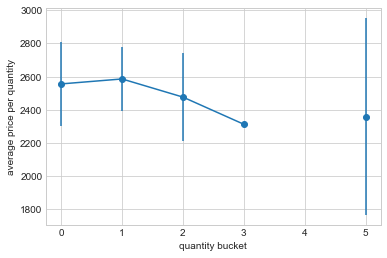

In [385]:
example2_prices, example2_errors = compute_average_price('5962R0722701VZA')
print(example2_prices)
plot_prices(example2_prices, example2_errors)

#### Example 3 - Part number 520100205R (Descrete)

[55.54999999999999, 51.001666666666665, 49.5, 48.74285714285714, 38.419999999999995, 45.26666666666667]


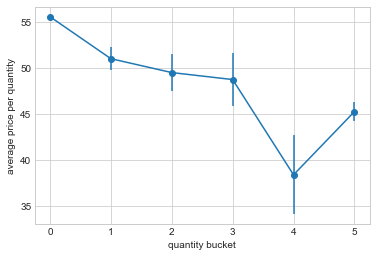

In [386]:
example3_prices, example3_errors = compute_average_price('520100205R')
print(example3_prices)
plot_prices(example3_prices, example3_errors)

#### Example 4 - Part number 5962R9673802VDA (Microcircuit)

[268.57142857142856, 232.5, 231.05, 249.16666666666666, 253.0, 190.66]


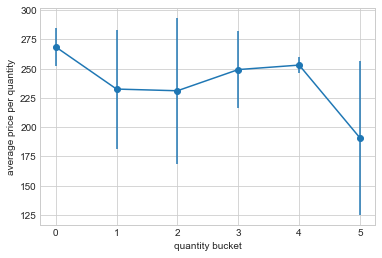

In [387]:
example4_prices, example4_errors = compute_average_price('5962R9673802VDA')
print(example4_prices)
plot_prices(example4_prices, example4_errors)

#### Example 5 - Part number 520200105R (Descrete)

[52.73199999999999, 49.606, 50.559000000000005, 47.75, 43.29, 39.685]


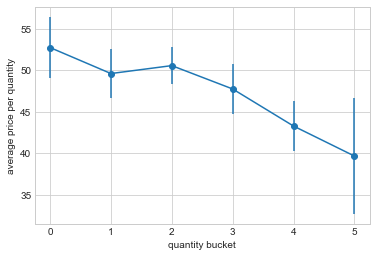

In [388]:
example5_prices, example5_errors = compute_average_price('520200105R')
print(example5_prices)
plot_prices(example5_prices, example5_errors)

#### Example 6 - Part number 510102608 (Descrete)

[39.29333333333333, 38.055, 36.419999999999995, 36.60857142857143, 39.5, 36.0]


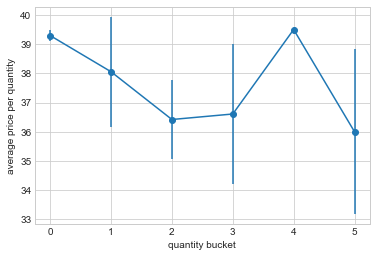

In [389]:
example6_prices, example6_errors = compute_average_price('510102608')
print(example6_prices)
plot_prices(example6_prices, example6_errors)

#### Example 7 - Part number 5962F0253501VXA (Microcircuit)

[nan, 407.5, 461.8333333333333, 387.5, nan, nan]


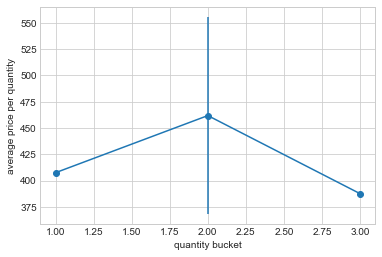

In [390]:
example7_prices, example7_errors = compute_average_price('5962F0253501VXA')
print(example7_prices)
plot_prices(example7_prices, example7_errors)

#### Example 8 - Part number 520301006R (Discrete)

[68.83, 69.70749999999998, 67.1, 69.2, 65.0, nan]


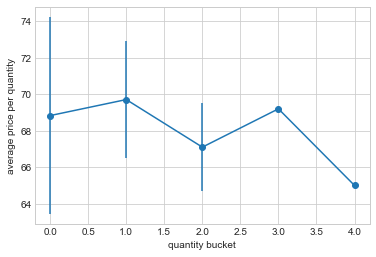

In [391]:
example8_prices, example8_errors = compute_average_price('520301006R')
print(example8_prices)
plot_prices(example8_prices, example8_errors)

#### Example 9 - Part number 520700215 (Discrete)

[111.78999999999999, 109.0, 107.61666666666667, 109.0, nan, 106.5]


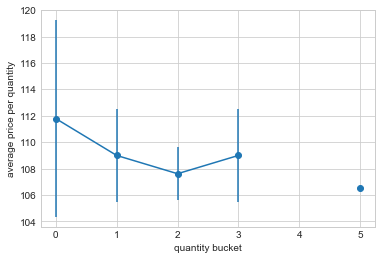

In [392]:
example9_prices, example9_errors = compute_average_price('520700215')
print(example9_prices)
plot_prices(example9_prices, example9_errors)

#### Example 10 - Part number 5962F0252401VXA (Microcircuit)

[411.0681818181818, 407.0, 421.0833333333333, 387.5, 340.0, nan]


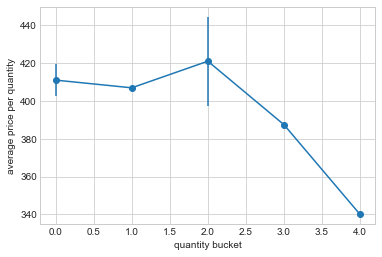

In [393]:
example10_prices, example10_errors = compute_average_price('5962F0252401VXA')
print(example10_prices)
plot_prices(example10_prices, example10_errors)